In [29]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [30]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("../Starter_Code/Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [31]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [32]:
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


### Prepare the Data

In [33]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled=StandardScaler().fit_transform(market_data_df)
market_data_scaled[:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [34]:
# Create a DataFrame with the scaled data
market_scaled_df=pd.DataFrame(market_data_scaled,columns=market_data_df.columns)
# market_scaled_df.head(3)
# Copy the crypto names from the original data
market_scaled_df["coin_id"]=market_data_df.index

# Set the coinid column as index
market_scaled_df.set_index("coin_id",inplace=True)

# Display sample data
market_scaled_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [60]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k=list(range(1,11))

# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model=KMeans(n_clusters=i,n_init="auto")
    k_model.fit(market_scaled_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow={"k":k,"inertia":inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df=pd.DataFrame(elbow)

# Display the DataFrame
elbow_df.head(5)

c:\Users\cassy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cassy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cassy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cassy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,287.000000
1,2,240.476415
2,3,164.646914
3,4,134.563587
4,5,66.217780


<Axes: title={'center': 'Elbow'}, xlabel='k'>

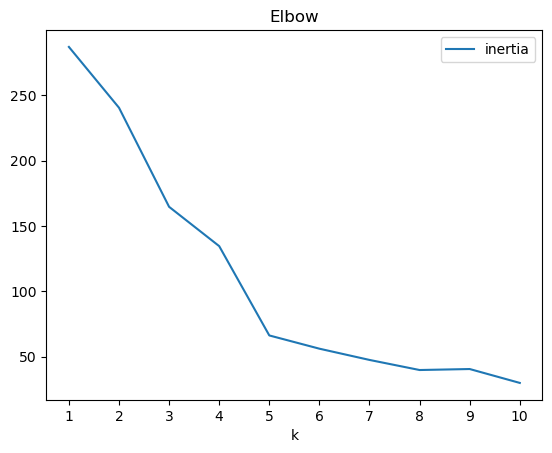

In [61]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(
    x="k",
    y="inertia",
    title="Elbow",
    xticks=k
)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 3 or 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [37]:
# Initialize the K-Means model using the best value for k
model =KMeans(n_clusters=3,n_init="auto")

In [38]:
# Fit the K-Means model using the scaled data
model.fit(market_scaled_df)

c:\Users\cassy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto')

In [39]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_lower=model.predict(market_scaled_df)

# View the resulting array of cluster values.
k_lower

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0])

In [40]:
# Create a copy of the DataFrame
predict_3=pd.DataFrame(market_scaled_df,columns=market_scaled_df.columns)

In [41]:
# repeating for 4
model4 =KMeans(n_clusters=4,n_init="auto")
model4.fit(market_scaled_df)
k_lower4=model4.predict(market_scaled_df)

predict_4=pd.DataFrame(market_scaled_df,columns=market_scaled_df.columns)

c:\Users\cassy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [42]:
# Add a new column to the DataFrame with the predicted clusters
predict_3["clusters_lower"]=k_lower
predict_4["clusters_lower"]=k_lower4

# Display sample data
display(predict_3.head(3))
display(predict_4.head(3))

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters_lower
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters_lower
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

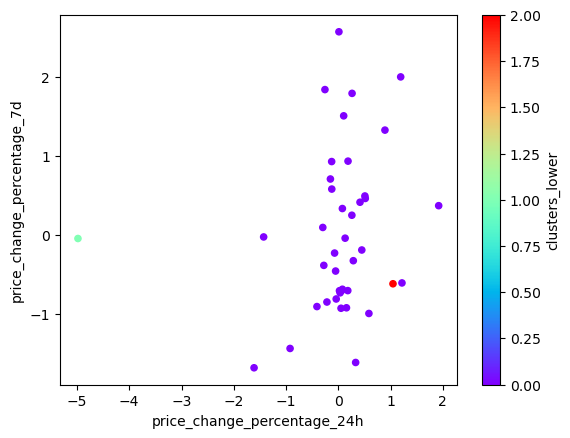

In [43]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
predict_3.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="clusters_lower",
    colormap="rainbow"
)

<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

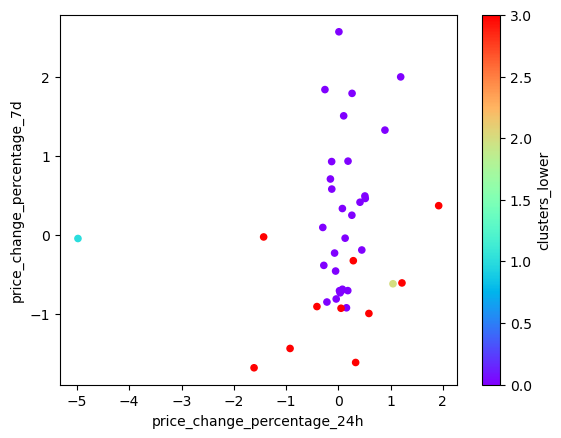

In [44]:
# Repeating for 4 clusters
predict_4.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="clusters_lower",
    colormap="rainbow"
)

### Conclusion
I like 4 clusters best

### Optimize Clusters with Principal Component Analysis.

In [45]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [46]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_pca=pca.fit_transform(market_scaled_df)

# View the first five rows of the DataFrame. 
market_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [47]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [48]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
market_pca_df=pd.DataFrame(market_pca,columns=["PCA1","PCA2","PCA3"])

# Copy the crypto names from the original data
market_pca_df["coin_id"]=market_data_df.index

# Set the coinid column as index
market_pca_df.set_index("coin_id",inplace=True)

# Display sample data
market_pca_df.head(3)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752


### Find the Best Value for k Using the PCA Data

In [49]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_pca=list(range(1,11))

# Create an empty list to store the inertia values
inertia_pca=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k_pca:
    k_model=KMeans(n_clusters=i,n_init="auto")
    k_model.fit(market_scaled_df)
    inertia_pca.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_pca={"k":k_pca,"inertia":inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df=pd.DataFrame(elbow_pca)

# Display the DataFrame
elbow_pca_df.head(3)

c:\Users\cassy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cassy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cassy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cassy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,287.000000
1,2,235.816943
2,3,145.635748


<Axes: title={'center': 'PCA Elbow'}, xlabel='k'>

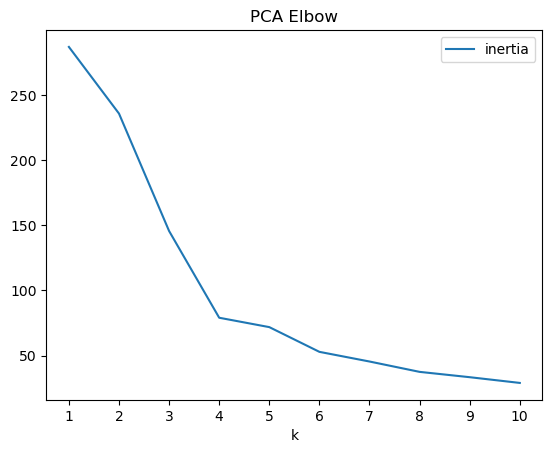

In [50]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca_df.plot.line(
    x="k",
    y="inertia",
    title="PCA Elbow",
    xticks=k_pca
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** I think the original data would work ok with three, but better with 4. So the PCA just shows 4 more clearly.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [51]:
# Initialize the K-Means model using the best value for k
model_pca=KMeans(n_clusters=4,n_init="auto")

In [52]:
# Fit the K-Means model using the PCA data
model_pca.fit(market_pca_df)

c:\Users\cassy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto')

In [53]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4=model_pca.predict(market_pca_df)

# Print the resulting array of cluster values.
k_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [54]:
# Create a copy of the DataFrame with the PCA data
pca_predictions=market_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_predictions["clusters"]=k_4

# Display sample data
pca_predictions.head(3)

,PCA1,PCA2,PCA3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0


<Axes: xlabel='PCA1', ylabel='PCA2'>

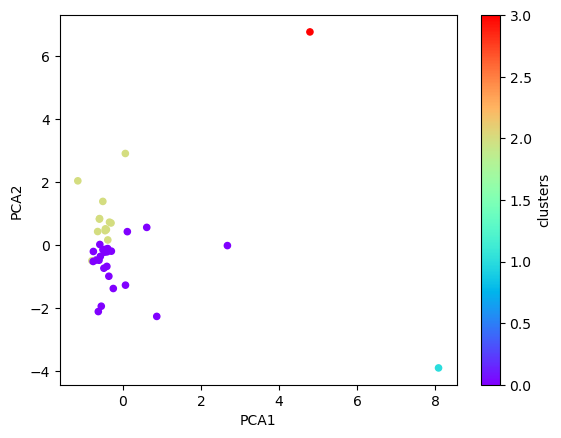

In [55]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_predictions.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="clusters",
    colormap="rainbow"
)

### Determine the Weights of Each Feature on each Principal Component

In [56]:
# Use the columns from the original scaled DataFrame as the index.
weights=pd.DataFrame(pca.components_.T,columns=["PCA1","PCA2","PCA3"],index=market_data_df.columns)
weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The principal components account for (in order) 37.2%, 34.7%, and 17.6% of the total variance.

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
> PCA1: price change % 200d - .594

> PCA2: price change % 30d - .562

> PCA3: price change % 7d - .787
    